In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import elasticite as el
import numpy as np
duration = el.get_default_args(el.EdgeGrid.render)['duration']

In [18]:
import sys
sys.path.append('..')
from scenario_line_fresnel import EdgeGrid
e = EdgeGrid(N_lame=25, grid_type='line')

In [19]:
e.lames.shape

(4, 31)

## Point-Line Distance--2-Dimensional

See http://mathworld.wolfram.com/Point-LineDistance2-Dimensional.html


In [20]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

[[ 0.2 -0.5  0.3]
 [ 0.3  1.1  0.9]]


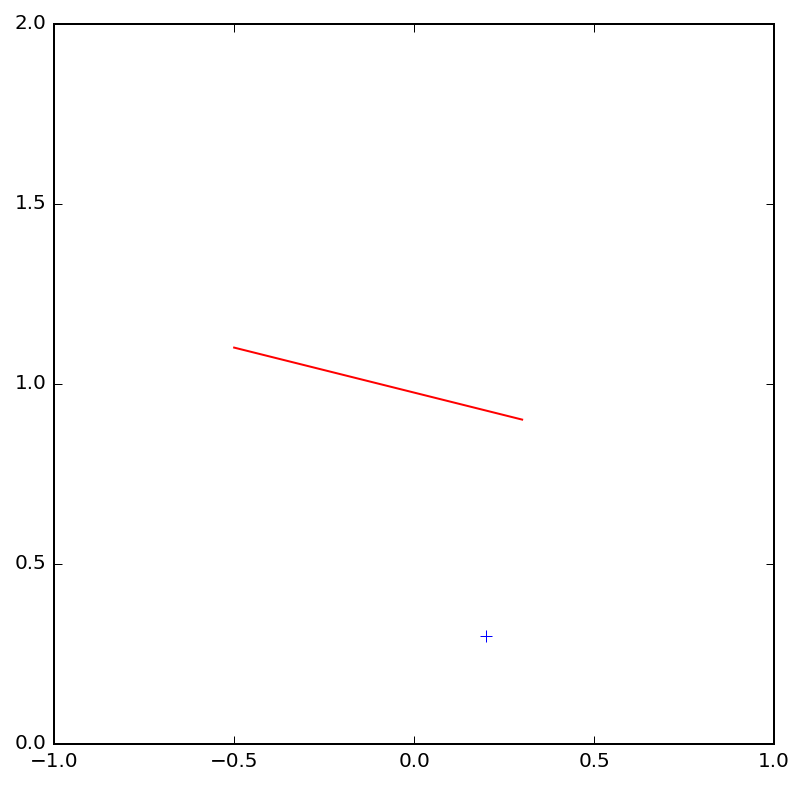

In [38]:
particles = np.array([[.2, .3], [-.5, 1.1], [.3, .9]]).T
fig = plt.figure(figsize=(5, 5))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
ax.plot(particles[0, 0], particles[1, 0], 'b+')
ax.plot(particles[0, 1:], particles[1, 1:], 'r')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2])
print(particles)

projection du point sur la droite

[[ 0.2 -0.5  0.3]
 [ 1.5  0.8  0.9]]
[ 0.2  1.5]
[[-0.8 -0.5]
 [-0.9  0.3]]
[ 0.1 -0.8]
0.49 0.80622577483 0.607770199487
[ 0.28  0.9 ]


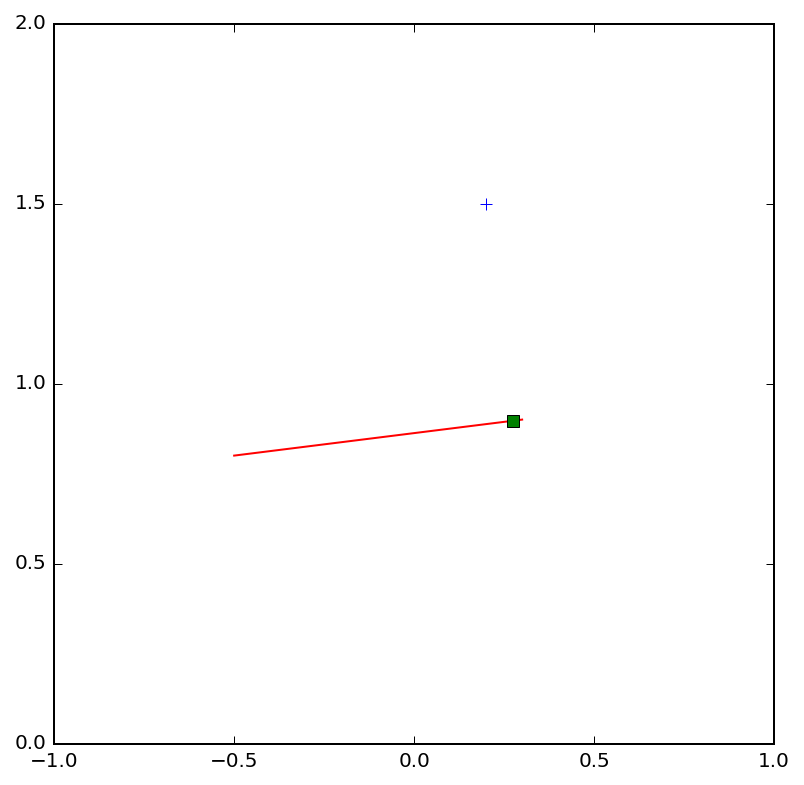

In [67]:
particles = np.array([[.2, 1.4], [-.5, 1.], [.4, 1.]]).T
particles = np.array([[.2, 1.5], [-.5, .8], [.3, .9]]).T
print(particles)
P = particles[:, 0].copy()
print(P)
print(np.dot(particles[:, 1:].T, np.array([[0, 1], [-1, 0]])))
perp = np.zeros_like(P)
perp[0] = particles[1, 2] - particles[1, 1]
perp[1] = -(particles[0, 2] - particles[0, 1])
print(perp)
# distance to the line
d = perp[0]*(particles[0, 1] - particles[0, 0]) + perp[1]*(particles[1, 1] - particles[1, 0])
print(d, np.sqrt(perp[0]**2 + perp[1]**2), d/np.sqrt(perp[0]**2 + perp[1]**2))
# normalizing
#perp /= np.sqrt((perp**2).sum())
#perp /= np.sqrt(perp[0]**2 + perp[1]**2)
P += d * perp / (perp[0]**2 + perp[1]**2)
fig = plt.figure(figsize=(5, 5))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
ax.plot(particles[0, 0], particles[1, 0], 'b+')
ax.plot(particles[0, 1:], particles[1, 1:], 'r')
ax.plot(P[0], P[1], 'gs')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2])
print(P)

shorter form

[ 0.28  0.9 ]


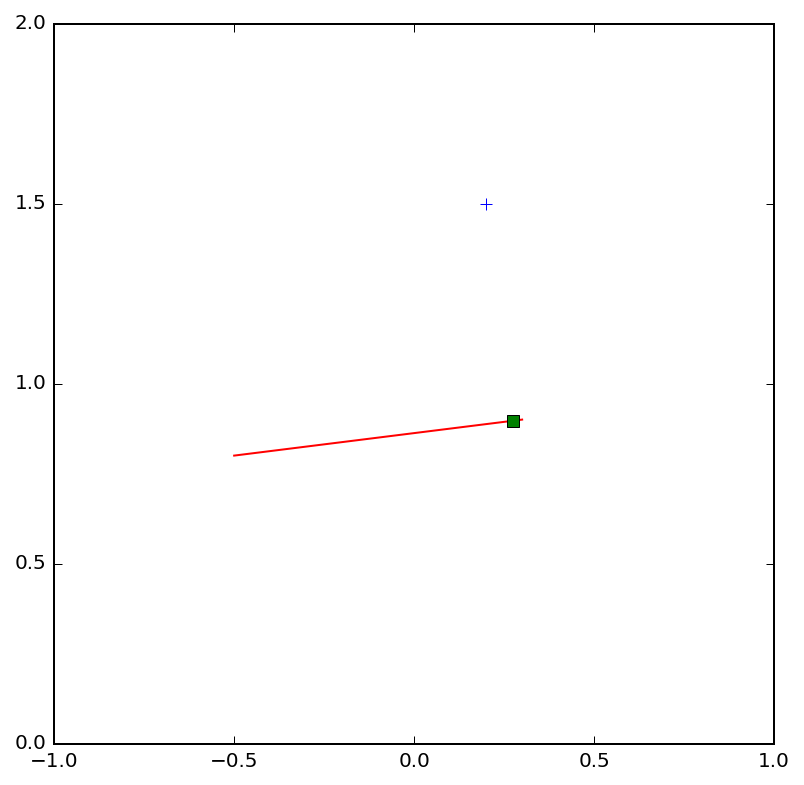

In [70]:
particles = np.array([[.2, 1.4], [-.5, 1.], [.4, 1.]]).T
particles = np.array([[.2, 1.5], [-.5, .8], [.3, .9]]).T
perp = np.array([particles[1, 2] - particles[1, 1], -(particles[0, 2] - particles[0, 1])])
# distance to the line
d = perp[0]*(particles[0, 1] - particles[0, 0]) + perp[1]*(particles[1, 1] - particles[1, 0])
P =  particles[:, 0] + d * perp / (perp**2).sum()

fig = plt.figure(figsize=(5, 5))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
ax.plot(particles[0, 0], particles[1, 0], 'b+')
ax.plot(particles[0, 1:], particles[1, 1:], 'r')
ax.plot(P[0], P[1], 'gs')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2])
print(P)

deducing the mirror image as twice this projection

[ 0.35  0.29]


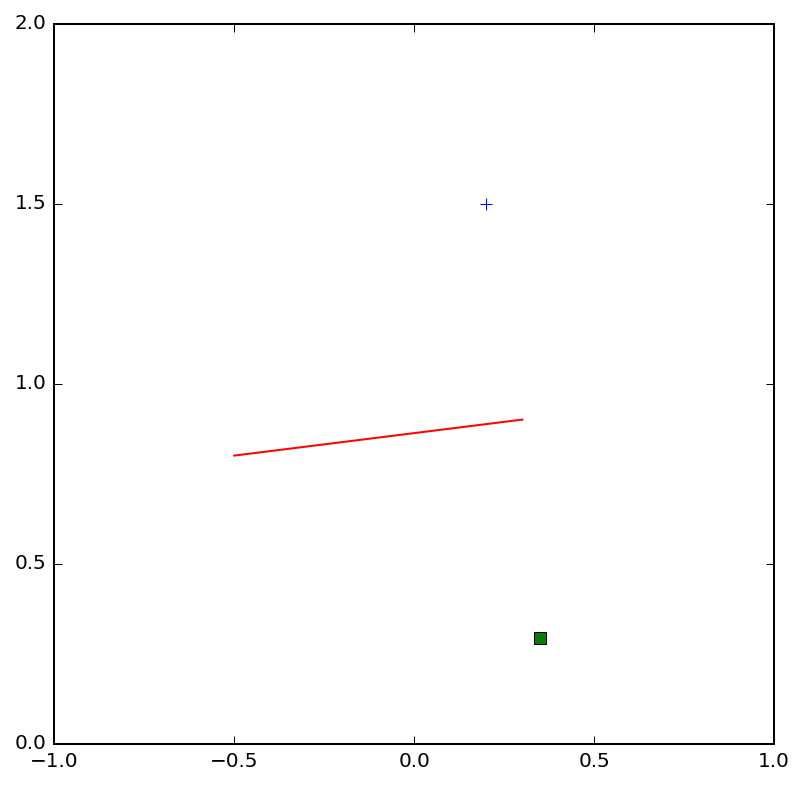

In [71]:
particles = np.array([[.2, 1.4], [-.5, 1.], [.4, 1.]]).T
particles = np.array([[.2, 1.5], [-.5, .8], [.3, .9]]).T
perp = np.array([particles[1, 2] - particles[1, 1], -(particles[0, 2] - particles[0, 1])])
# distance to the line
d = perp[0]*(particles[0, 1] - particles[0, 0]) + perp[1]*(particles[1, 1] - particles[1, 0])
P =  particles[:, 0] + 2 *d * perp / (perp**2).sum()

fig = plt.figure(figsize=(5, 5))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
ax.plot(particles[0, 0], particles[1, 0], 'b+')
ax.plot(particles[0, 1:], particles[1, 1:], 'r')
ax.plot(P[0], P[1], 'gs')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2])
print(P)

a function

In [73]:
particles.T.tolist()

[[0.2, 1.5], [-0.5, 0.8], [0.3, 0.9]]

[[ 0.2 -0.5  0.3]
 [ 1.5  0.8  0.9]]
[[-0.5  0.5]
 [ 0.5  1.5]]
[ 1. -1.]
[[ 0.3  0.3 -0.4]]
[[ 0.5 -0.2 -0.1]
 [ 1.2  0.5  1.3]]


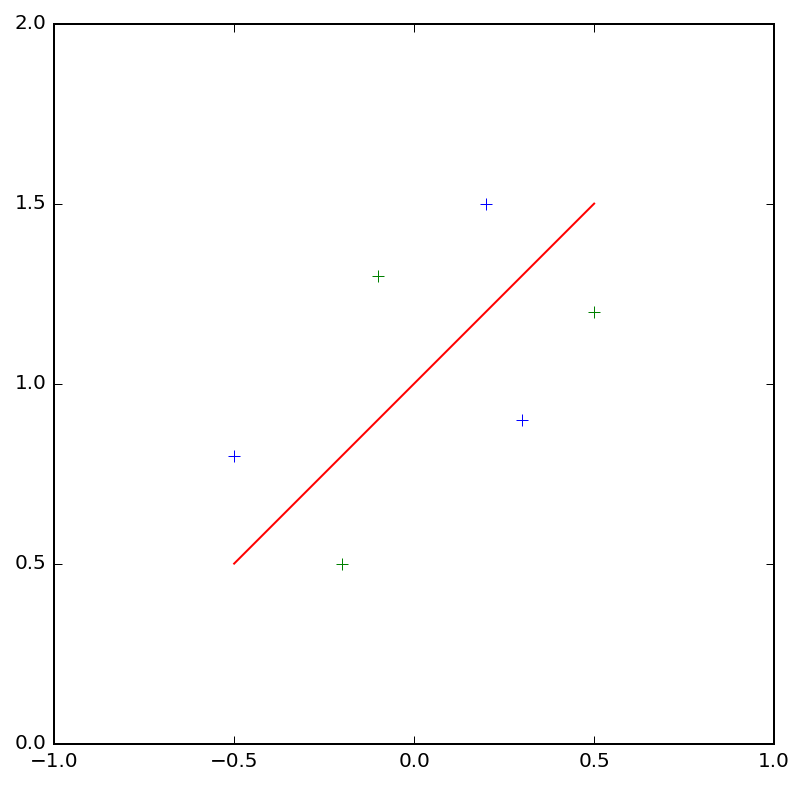

In [98]:
particles = np.random.rand(2, 10)
particles = np.array([[.2, 1.5], [-.5, .8], [.3, .9]]).T
print(particles)
segment = np.array([[-.5, .5], [.5, 1.5]]).T
print(segment)
def mirror(particles, segment):
    mirror = particles.copy()
    perp = np.array([segment[1, 1] - segment[1, 0], -(segment[0, 1] - segment[0, 0])])
    print(perp)
    # distance to the line
    d = perp[0]*(segment[0, 1] - particles[0, :]) + perp[1]*(segment[1, 1] - particles[1, :])
    print(d[np.newaxis, :])
    mirror =  particles + 2 * d[np.newaxis, :] * perp[:, np.newaxis] / (perp**2).sum()
    return mirror

particles_mirror = mirror(particles, segment)

fig = plt.figure(figsize=(5, 5))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
ax.plot(particles[0, :], particles[1, :], 'b+')
ax.plot(segment[0, :], segment[1, :], 'r')
ax.plot(particles_mirror[0, :], particles_mirror[1, :], 'g+')
ax.plot(particles_mirror[0, :], np.hstack((particles[1, :], particles_mirror[1, :])), 'k')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2])
print(particles_mirror)

## git


In [14]:
!git s
!git add 2015-11-02\ élasticité\ expansion\ en\ miroir.ipynb

 M "2015-10-27 \303\251lasticit\303\251 expansion-r\303\251action diffusion.ipynb"
 M "2015-10-27 \303\251lasticit\303\251 expansion.ipynb"
A  "2015-11-02 \303\251lasticit\303\251 expansion en miroir.ipynb"
?? "../notes-Laurent/2015-10-22_\303\251lasticit\303\251 LAMES-Dynamique_pdf.pdf"
?? __temp__.mp4
?? __temp_ipython__.png
?? anim.gif
?? ../screenshot.png


In [15]:
!git commit -am' expansion - on commence le miroir'

[master 171246f]  expansion - on commence le miroir
 3 files changed, 574 insertions(+), 940 deletions(-)
 rewrite "posts/2015-10-27 \303\251lasticit\303\251 expansion.ipynb" (98%)
 copy "posts/2015-10-27 \303\251lasticit\303\251 expansion.ipynb" => "posts/2015-11-02 \303\251lasticit\303\251 expansion en miroir.ipynb" (97%)


In [44]:
! git push


Counting objects: 4, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 141.42 KiB | 0 bytes/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: 
remote: ========================================================================
remote: 
remote:       Mise à jour de Gitlab mardi 27 octobre à partir de 19h. Voir
remote:                       https://status.framasoft.org
remote: 
remote: ========================================================================
To git@git.framasoft.org:laurentperrinet/elasticte.git
   1db96f9..374f2b2  master -> master
